<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.161391,20.107838,53.465515,0.027533,144.762277,145.566703,-0.804425
1,0.0,1.0,50.577977,70.357052,78.547844,-1.200120,208.282753,210.673587,-2.390834
2,0.0,2.0,85.677446,89.104845,34.957909,-9.944952,209.795249,218.067515,-8.272266
3,0.0,3.0,47.557066,80.660508,86.242170,5.468396,229.928140,225.881144,4.046996
4,0.0,4.0,44.732970,83.639019,77.615088,-1.691308,214.295769,216.738216,-2.442447
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.606352,91.424471,43.005834,-2.594797,193.441860,198.901712,-5.459853
19996,999.0,16.0,79.469739,53.641282,31.802815,-4.707912,170.205924,174.929511,-4.723586
19997,999.0,17.0,70.768106,45.646102,39.905873,9.270357,175.590438,165.724586,9.865852
19998,999.0,18.0,85.841967,79.059314,73.519002,4.959037,253.379319,249.236765,4.142554


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.161391,20.107838,53.465515,0.027533,144.762277,145.566703,-0.804425
1,0.0,1.0,50.577977,70.357052,78.547844,-1.200120,208.282753,210.673587,-2.390834
2,0.0,2.0,85.677446,89.104845,34.957909,-9.944952,209.795249,218.067515,-8.272266
3,0.0,3.0,47.557066,80.660508,86.242170,5.468396,229.928140,225.881144,4.046996
4,0.0,4.0,44.732970,83.639019,77.615088,-1.691308,214.295769,216.738216,-2.442447
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.606352,91.424471,43.005834,-2.594797,193.441860,198.901712,-5.459853
19996,999.0,16.0,79.469739,53.641282,31.802815,-4.707912,170.205924,174.929511,-4.723586
19997,999.0,17.0,70.768106,45.646102,39.905873,9.270357,175.590438,165.724586,9.865852
19998,999.0,18.0,85.841967,79.059314,73.519002,4.959037,253.379319,249.236765,4.142554


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.161391  20.107838  53.465515  0.027533  144.762277   
      1.0    50.577977  70.357052  78.547844 -1.200120  208.282753   
      2.0    85.677446  89.104845  34.957909 -9.944952  209.795249   
      3.0    47.557066  80.660508  86.242170  5.468396  229.928140   
      4.0    44.732970  83.639019  77.615088 -1.691308  214.295769   
...                ...        ...        ...       ...         ...   
999.0 15.0   51.606352  91.424471  43.005834 -2.594797  193.441860   
      16.0   79.469739  53.641282  31.802815 -4.707912  170.205924   
      17.0   70.768106  45.646102  39.905873  9.270357  175.590438   
      18.0   85.841967  79.059314  73.519002  4.959037  253.379319   
      19.0   73.394114  99.572871  83.405053  6.360232  272.732270   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    145.566703 -0.804425  
      1.0    210.673587 -2.390834  
      2.0    218.067515 -8.272266  
      3.0    225.881144  4.046996  
      4.0    216.738216 -2.442447  
...                 ...       ...  
999.0 15.0   198.901712 -5.459853  
      16.0   174.929511 -4.723586  
      17.0   165.724586  9.865852  
      18.0   249.236765  4.142554  
      19.0   268.613054  4.119216  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.161391  20.107838  53.465515  0.027533  144.762277   
      1.0    50.577977  70.357052  78.547844 -1.200120  208.282753   
      2.0    85.677446  89.104845  34.957909 -9.944952  209.795249   
      3.0    47.557066  80.660508  86.242170  5.468396  229.928140   
      4.0    44.732970  83.639019  77.615088 -1.691308  214.295769   
...                ...        ...        ...       ...         ...   
999.0 15.0   51.606352  91.424471  43.005834 -2.594797  193.441860   
      16.0   79.469739  53.641282  31.802815 -4.707912  170.205924   
      17.0   70.768106  45.646102  39.905873  9.270357  175.590438   
      18.0   85.841967  79.059314  73.519002  4.959037  253.379319   
      19.0   73.394114  99.572871  83.405053  6.360232  272.732270   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    145.566703 -0.804425  
      1.0    210.673587 -2.390834  
      2.0    218.067515 -8.272266  
      3.0    225.881144  4.046996  
      4.0    216.738216 -2.442447  
...                 ...       ...  
999.0 15.0   198.901712 -5.459853  
      16.0   174.929511 -4.723586  
      17.0   165.724586  9.865852  
      18.0   249.236765  4.142554  
      19.0   268.613054  4.119216  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.161391,20.107838,53.465515,0.027533,144.762277,145.566703,-0.804425
1,0.0,1.0,50.577977,70.357052,78.547844,-1.200120,208.282753,210.673587,-2.390834
2,0.0,2.0,85.677446,89.104845,34.957909,-9.944952,209.795249,218.067515,-8.272266
3,0.0,3.0,47.557066,80.660508,86.242170,5.468396,229.928140,225.881144,4.046996
4,0.0,4.0,44.732970,83.639019,77.615088,-1.691308,214.295769,216.738216,-2.442447
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.606352,91.424471,43.005834,-2.594797,193.441860,198.901712,-5.459853
19996,999.0,16.0,79.469739,53.641282,31.802815,-4.707912,170.205924,174.929511,-4.723586
19997,999.0,17.0,70.768106,45.646102,39.905873,9.270357,175.590438,165.724586,9.865852
19998,999.0,18.0,85.841967,79.059314,73.519002,4.959037,253.379319,249.236765,4.142554


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.161391  20.107838  53.465515  0.027533  144.762277   
      1.0    50.577977  70.357052  78.547844 -1.200120  208.282753   
      2.0    85.677446  89.104845  34.957909 -9.944952  209.795249   
      3.0    47.557066  80.660508  86.242170  5.468396  229.928140   
      4.0    44.732970  83.639019  77.615088 -1.691308  214.295769   
...                ...        ...        ...       ...         ...   
999.0 15.0   51.606352  91.424471  43.005834 -2.594797  193.441860   
      16.0   79.469739  53.641282  31.802815 -4.707912  170.205924   
      17.0   70.768106  45.646102  39.905873  9.270357  175.590438   
      18.0   85.841967  79.059314  73.519002  4.959037  253.379319   
      19.0   73.394114  99.572871  83.405053  6.360232  272.732270   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    145.566703 -0.804425  
      1.0    210.673587 -2.390834  
      2.0    218.067515 -8.272266  
      3.0    225.881144  4.046996  
      4.0    216.738216 -2.442447  
...                 ...       ...  
999.0 15.0   198.901712 -5.459853  
      16.0   174.929511 -4.723586  
      17.0   165.724586  9.865852  
      18.0   249.236765  4.142554  
      19.0   268.613054  4.119216  

[20000 rows x 7 columns]

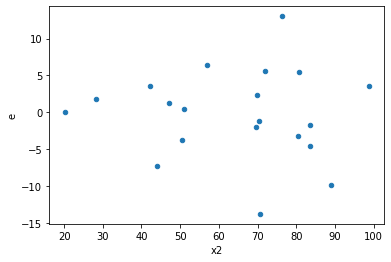

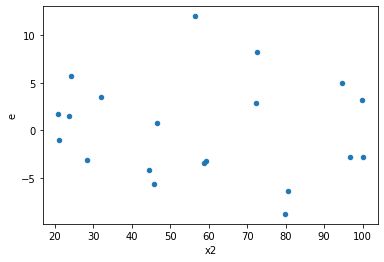

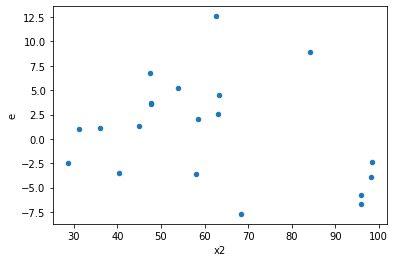

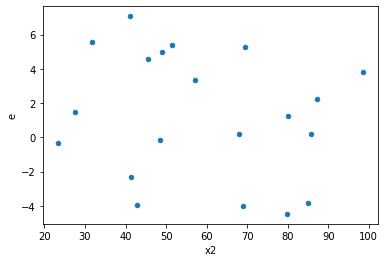

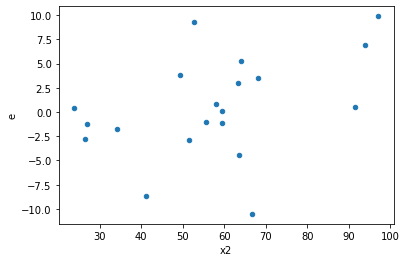

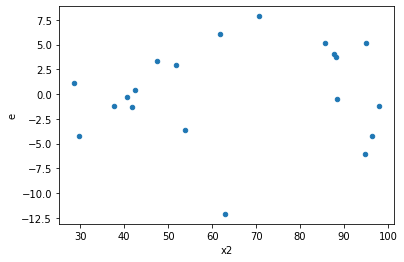

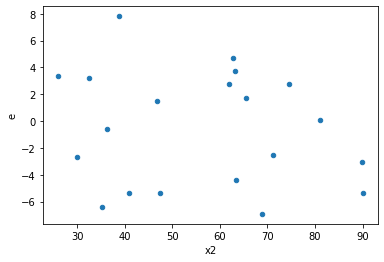

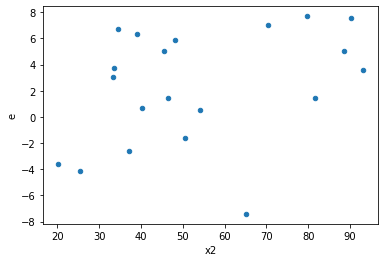

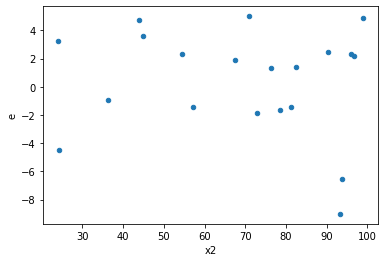

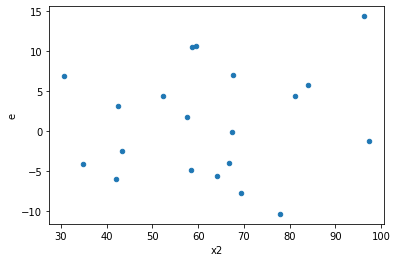

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,107.47999316346376,296.21582721656694,21.495998632692753,59.24316544331339,2.756008988259418,0.29013043630824775,0.8549347818458761,0.14506521815412388,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,31.170728187284254,81.31389595221638,6.234145637456851,16.262779190443275,2.6086620583149376,0.31611864514441335,0.8419406774277933,0.15805932257220667,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,161.5432664110681,180.440364711144,32.30865328221362,36.088072942228806,1.1169785576329117,0.9063354125324194,0.5468322937337903,0.4531677062662097,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,21.18013845405953,105.9826607203695,4.236027690811906,21.1965321440739,5.003870062051276,0.10178849255012068,0.9491057537249397,0.05089424627506034,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,46.091065462856825,79.39338799205015,9.218213092571364,15.87867759841003,1.722533145952777,0.5651570288144185,0.7174214855927907,0.28257851440720927,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,8.409450429122016,69.43133335582236,1.6818900858244032,13.886266671164472,8.256346112152693,0.036958587035291535,0.9815207064823542,0.018479293517645767,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,110.57246821425326,224.990490926579,22.114493642850654,44.998098185315804,2.034778589645128,0.45420005676186204,0.772899971619069,0.22710002838093102,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,39.212519547006245,44.45021681838745,7.842503909401249,8.89004336367749,1.133572066571812,0.8939267759852054,0.5530366120073973,0.4469633879926027,Reject001=1 : Homoscedasticity
12.0,5.0,5.0,24.665621752679282,157.87631436653535,4.933124350535857,31.57526287330707,6.400662263840407,0.06264656965708482,0.9686767151714576,0.03132328482854241,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,107.47999316346376,296.21582721656694,21.495998632692753,59.24316544331339,2.756008988259418,0.29013043630824775,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,144.5707208950042,137.40849555355834,28.91414417900084,27.481699110711666,0.9504586731178611,0.9568938104010655,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,221.36301555564373,128.69482614169792,44.272603111128745,25.738965228339584,0.5813745616839416,0.5661729482753706,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,31.170728187284254,81.31389595221638,6.234145637456851,16.262779190443275,2.6086620583149376,0.31611864514441335,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,161.5432664110681,180.440364711144,32.30865328221362,36.088072942228806,1.1169785576329117,0.9063354125324194,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,21.18013845405953,105.9826607203695,4.236027690811906,21.1965321440739,5.003870062051276,0.10178849255012068,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,70.36767438513957,61.907324050302265,14.073534877027914,12.381464810060454,0.8797693627256782,0.891639564529101,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,46.091065462856825,79.39338799205015,9.218213092571364,15.87867759841003,1.722533145952777,0.5651570288144185,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,8.409450429122016,69.43133335582236,1.6818900858244032,13.886266671164472,8.256346112152693,0.036958587035291535,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      968
Reject001=0 : Heteroscedasticity     32
Name: Result_test, dtype: int64